# Coffee Reviews Dataset

#### By Mohammad Alturayr

### introduction:  
In this project I decided to analysed coffee reviews dataset found on kaggle: https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset by using the CRISP-DM Process.

### Read & clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

In [2]:
dff = pd.read_csv('simplified_coffee.csv')

In [3]:
print(dff.shape)
dff.head()

(1246, 9)


,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


As we can see, the dataset had 1246 rows & 9 columns.

**dataset columns**:

  * name: Name of the blend
  * roaster: Name of the roaster
  * roast: Type of roast (Light, Medium-Light, Medium, Medium-Dark, Dark)
  * loc_country: Location of the roaster
  * origin: Origin of the beans
  * 100g_USD: price per 100g of beans in US dollar
  * rating: Rating of the coffee
  * review_date: Date of the coffee review
  * review: Text of review

### Discover and cleaning the Data

In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


In [5]:
dff.isnull().sum()

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

In [6]:
dff.duplicated().sum()

0

As we can see the data almost clean im only going to drop the null values and change review_date datatype to datetime. 

In [7]:
dff['review_date'] = pd.to_datetime(dff['review_date']) 

In [8]:
dff.dropna(inplace=True)

In [9]:
#check if its work
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         1234 non-null   object        
 1   roaster      1234 non-null   object        
 2   roast        1234 non-null   object        
 3   loc_country  1234 non-null   object        
 4   origin       1234 non-null   object        
 5   100g_USD     1234 non-null   float64       
 6   rating       1234 non-null   int64         
 7   review_date  1234 non-null   datetime64[ns]
 8   review       1234 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 96.4+ KB


In [10]:
dff.describe()

,100g_USD,rating
count,1234.000000,1234.000000
mean,10.093679,93.300648
std,11.965835,1.483475
min,0.170000,84.000000
25%,5.280000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


* As we can see the price will start from 0.17 cents per 100g to 132.28 dollar per 100g. Average price of coffee is 10 dollars.
* The rating will start from 84 to 97 and the average rate of coffee is 93 

### Analyse and Visualise the dataset

In [11]:
#craete function for bar chart
def barplot(col_name):
     
    '''
    This function provide the counts for each series in a column and plot it in bar plot.
    
    input: col_name -- column name
    output: plot bar that showing value counts of the column
    
    '''
    col = dff[col_name].value_counts()[:5]
    col.plot(kind="bar", color='purple')
    plt.title('numper of ' +col_name)
    plt.xlabel(col_name)
    plt.ylabel('Number of each '+col_name)
    plt.figure(figsize=(8,4))

In [12]:
#craete top 5 function for bar chart
def top5barplot(col_name):
     
    '''
    This function provide the counts for each series in a column and plot it in bar plot.
    
    input: col_name -- column name
    output: plot bar that showing top 5 value counts of the column
    
    '''
    col = dff[col_name].value_counts()[:5]
    col.plot(kind="bar", color='purple')
    plt.title('Top 5 of ' +col_name)
    plt.xlabel(col_name)
    plt.ylabel('Number of each '+col_name)
    plt.figure(figsize=(8,4))

**Q- What is the most popular roast type?**

In [13]:
#lets check out how many Type of each roast
roast_vc = dff.roast.value_counts()
roast_vc

Medium-Light    904
Light           198
Medium          114
Medium-Dark      15
Dark              3
Name: roast, dtype: int64

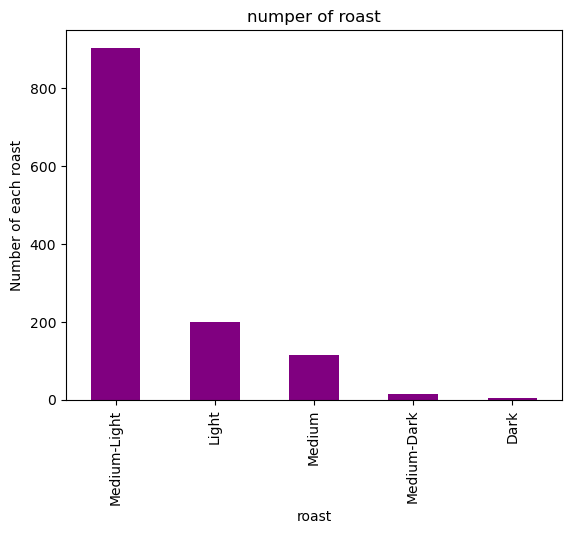

<Figure size 800x400 with 0 Axes>

In [14]:
barplot('roast')

From the graph above, Medium-Light roast is the most popular.

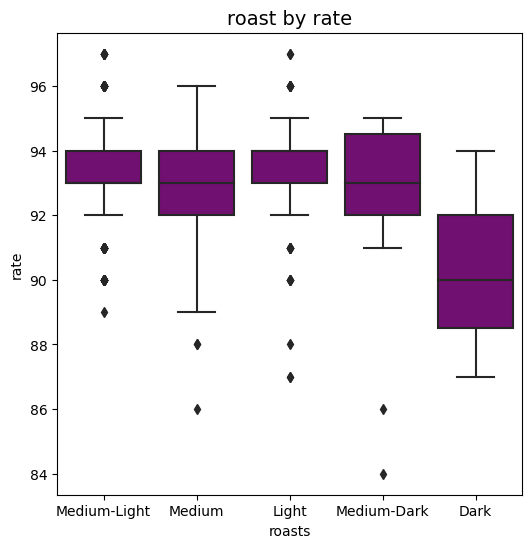

In [15]:
plt.figure(figsize=(6,6))
base_color = sns.color_palette()[4]
sns.boxplot(data = dff, x = 'roast', y = 'rating', color = 'purple')
plt.title('roast by rate', fontsize = 14)
plt.xlabel('roasts')
plt.ylabel('rate');

**Q- which country got the mean highest rate?**

In [16]:
df2 = dff.groupby('loc_country').mean()
df2

,100g_USD,rating
loc_country,,
Australia,69.000000,96.000000
Canada,4.986000,93.600000
China,22.530000,90.000000
England,50.415000,94.500000
Guatemala,3.545417,90.500000
Hawai'i,18.151688,93.415584
Hong Kong,15.617778,92.666667
Japan,10.748750,92.375000
Kenya,6.910000,94.000000


In [17]:
df2.describe()

,100g_USD,rating
count,12.000000,12.000000
mean,19.229524,93.078268
std,20.056695,1.621718
min,3.545417,90.000000
25%,8.655088,92.593750
50%,10.450812,93.328415
75%,19.246266,93.730539
max,69.000000,96.000000


In [18]:
#top 10 countries with most mean rate
df3 = df2.sort_values(by='rating',ascending=False)[:10]
df3

,100g_USD,rating
loc_country,,
Australia,69.000000,96.000000
England,50.415000,94.500000
Kenya,6.910000,94.000000
Taiwan,10.152874,93.640719
Canada,4.986000,93.600000
Hawai'i,18.151688,93.415584
United States,9.236783,93.241245
New Taiwan,9.460000,93.000000
Hong Kong,15.617778,92.666667


In [19]:
x_values = df3['rating']
y_values = df3.index.to_series()

In [20]:
y_values

loc_country
Australia            Australia
England                England
Kenya                    Kenya
Taiwan                  Taiwan
Canada                  Canada
Hawai'i                Hawai'i
United States    United States
New Taiwan          New Taiwan
Hong Kong            Hong Kong
Japan                    Japan
Name: loc_country, dtype: object

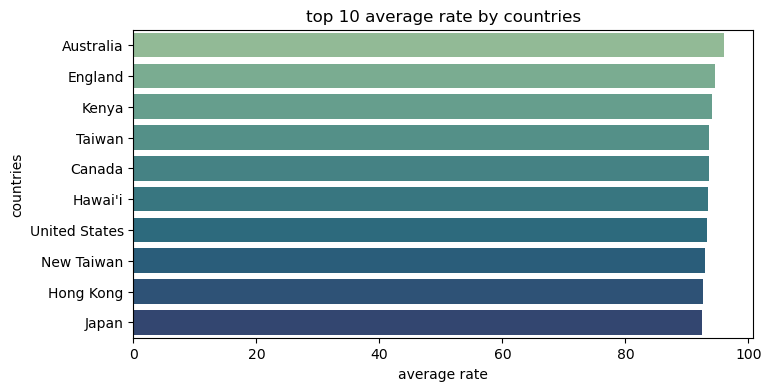

In [21]:
plt.figure(figsize=(8,4))
plt.xlim()
sns.barplot(x=x_values,y=y_values,palette='crest')
plt.title('top 10 average rate by countries')
plt.xlabel('average rate')
plt.ylabel('countries');

We note from the graph that the rate is close among the top 10 countries and all of them obtained a rate of more than 90.

**Q- What are the top 5 countries that have the most expensive coffee by mean?**

In [22]:
df4 = df2.sort_values(by='100g_USD',ascending=False)[:5]
df4

,100g_USD,rating
loc_country,,
Australia,69.000000,96.000000
England,50.415000,94.500000
China,22.530000,90.000000
Hawai'i,18.151688,93.415584
Hong Kong,15.617778,92.666667


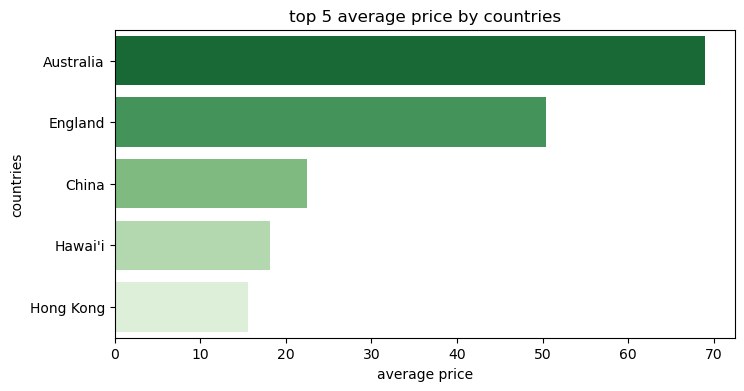

In [23]:
yy_values = df4.index.to_series()
xx_values = df4['100g_USD']
plt.figure(figsize=(8,4))
plt.xlim()
sns.barplot(x=xx_values,y=yy_values,palette='Greens_r')
plt.title('top 5 average price by countries')
plt.xlabel('average price')
plt.ylabel('countries');

Australia produces the most expensive country for its roasters, followed by Britain, China, Hawaii and Hong Kong.

**Q- What is the most common evaluation in the data?**

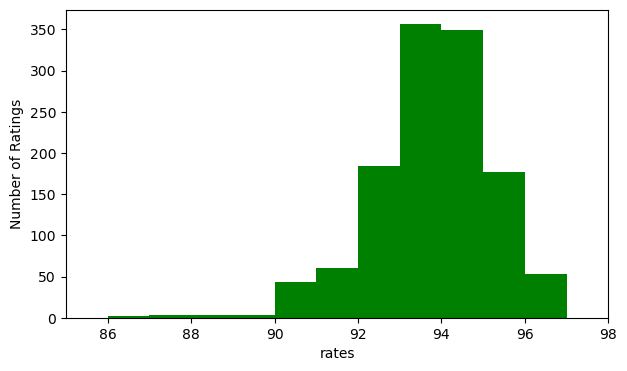

In [24]:
plt.figure(figsize=(7,4))
bin_edges = np.arange (85, dff['rating'].max()+1, 1)
plt.hist(data = dff, x = 'rating', bins = bin_edges, color = 'green')
plt.xlim(85,98)
#plt.xticks([85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100])
plt.xlabel('rates')
plt.ylabel('Number of Ratings')
plt.show();

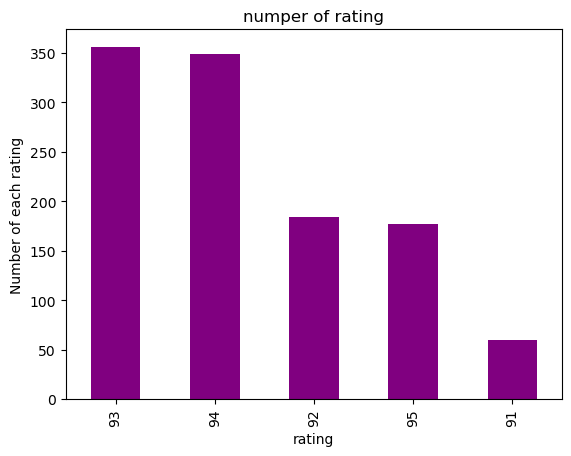

<Figure size 800x400 with 0 Axes>

In [25]:
barplot('rating')

From the graphs above, we can see that the most common rate is 93 and 94.

**Q- What country has the most roasters?**

In [27]:
dff.loc_country.value_counts()

United States    771
Taiwan           334
Hawai'i           77
Guatemala         24
Hong Kong          9
Japan              8
Canada             5
England            2
Australia          1
China              1
Kenya              1
New Taiwan         1
Name: loc_country, dtype: int64

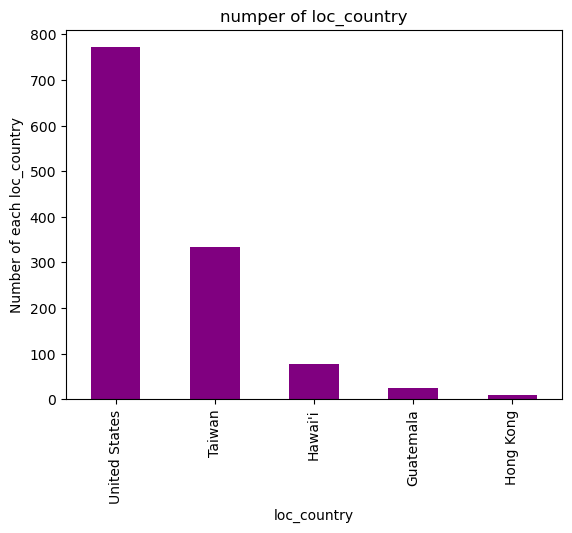

<Figure size 800x400 with 0 Axes>

In [28]:
barplot('loc_country')

As we can see from the graph above that the top 3 locations of the roasters are United States, Taiwan and Hawai'i.

**Q- What are the top 5 roasters in the data?**

In [30]:
#lets check out the top 10 roasters on dataset
dff.roaster.value_counts()[:5]

JBC Coffee Roasters          91
Kakalove Cafe                91
Paradise Roasters            83
Dragonfly Coffee Roasters    30
Bird Rock Coffee Roasters    29
Name: roaster, dtype: int64

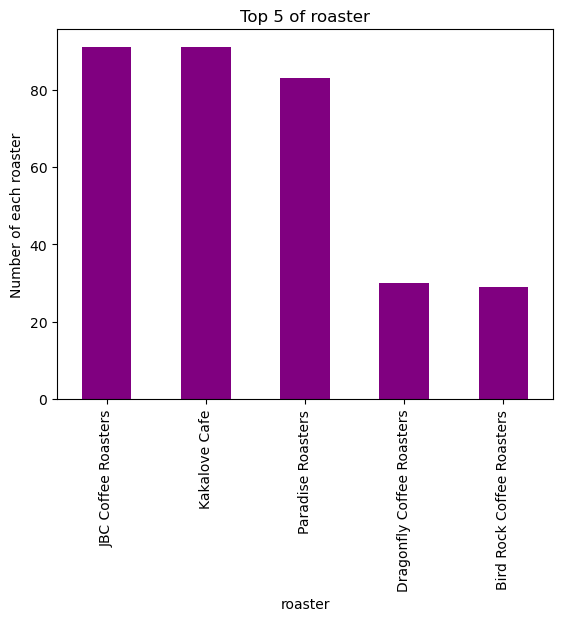

<Figure size 800x400 with 0 Axes>

In [31]:
top5barplot('roaster')

**Q- what is the most origin of the beans in the dataset?**

In [32]:
dff.origin.value_counts()[:10]

Ethiopia                            443
Colombia                            151
Kenya                               143
Hawai'I                             113
Guatemala                            96
Panama                               65
Costa Rica                           46
Indonesia                            28
El Salvador                          14
Democratic Republic Of The Congo     14
Name: origin, dtype: int64

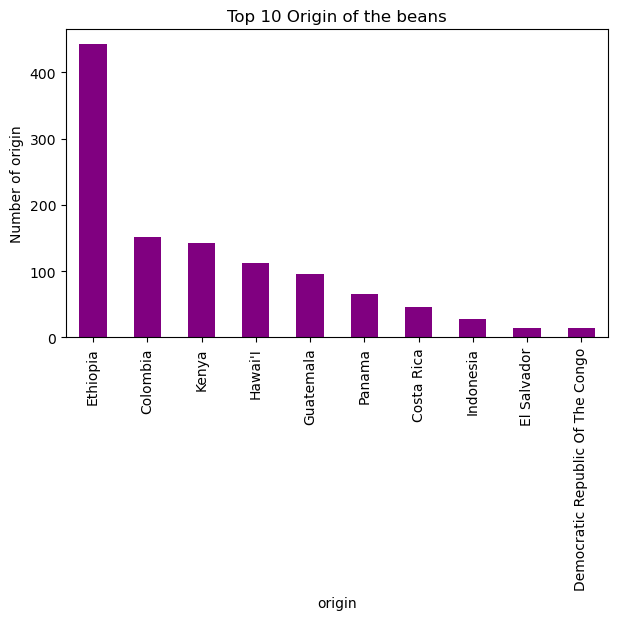

In [33]:
origin = dff.origin.value_counts()[:10]
plt.figure(figsize=(7,4))
origin.plot(kind='bar',color='purple')
plt.title('Top 10 Origin of the beans')
plt.xlabel('origin')
plt.ylabel('Number of origin');

As we note, Ethiopian coffee is the most widespread in the world, and in my personal opinion, it is considered the best coffee after Colombian coffee.

**Q- what is the most expensive coffee?**

In [34]:
dff['100g_USD'].max()

132.28

In [35]:
dff.loc[dff['100g_USD'] == 132.28]

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
943,Mama Cata Mokkita,Paradise Roasters,Medium-Light,United States,Panama,132.28,97,2021-11-01,"Aromatically other-worldly, resoundingly juicy..."


Mama Cata Mokkita got the most expensive coffee and from my analysis before, it's Medium-Light beans which is the most popular roast and got high rates (above 90).

In [36]:
eth = dff.loc[dff['origin'] == 'Ethiopia']

In [38]:
#plt.figure(figsize=(7,4))
#bin_edges = np.arange (10, eth['100g_USD'].max()+1, 5)
#plt.hist(data = eth, x = '100g_USD', bins = bin_edges)
#plt.xlim(10,135)
#plt.xticks([10,15,20,30,40,50,70,90,110])
#plt.xlabel('100g_USD')
#plt.ylabel('Number of Ratings')
#plt.show();

**Q- Is there a relationship between rate and the price?**

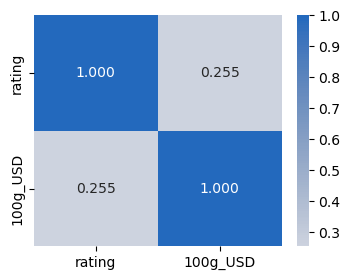

In [39]:
num_vars = ['rating' , '100g_USD']
cat_vars = ['roaster','roast','loc_country','origin']
plt.figure(figsize= [4,3])
sns.heatmap(dff[num_vars].corr(), annot= True , fmt = '.3f' , cmap = 'vlag_r' , center = 0)
plt.show();

As we can see, 0.255 between 0 and 0.3 which mean we have a weak relationship.

In [40]:
dff['100g_USD'].describe()

count    1234.000000
mean       10.093679
std        11.965835
min         0.170000
25%         5.280000
50%         6.170000
75%         9.600000
max       132.280000
Name: 100g_USD, dtype: float64

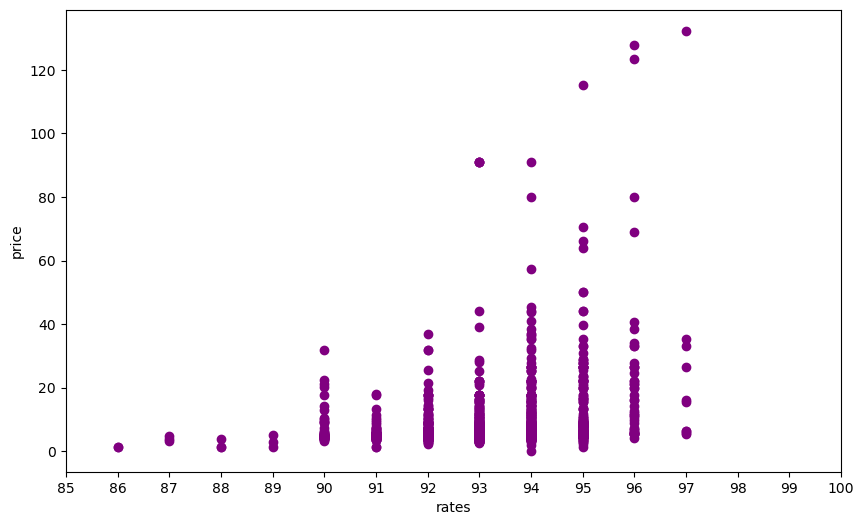

In [41]:
plt.figure(figsize=(10,6))
bin_edges = np.arange (85, dff['rating'].max()+1, 1)
plt.scatter(data = dff, x = 'rating',y='100g_USD',color='purple')
plt.xlim(85,100)
plt.xticks([85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100])
plt.xlabel('rates')
plt.ylabel('price')
plt.show();

In [42]:
#To use simple linear regression 
import statsmodels.api as sm

In [43]:
dff['intercept'] = 1

lm = sm.OLS(dff['100g_USD'], dff[['intercept','rating']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               100g_USD   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     85.88
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           8.28e-20
Time:                        01:55:46   Log-Likelihood:                -4771.8
No. Observations:                1234   AIC:                             9548.
Df Residuals:                    1232   BIC:                             9558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -182.0145     20.733     -8.779      0.000    -222.691    -141.338
rating         2.0590      0.222      9.267      0.000       1.623       2.495
==============================================================================
Omnibus:                     1305.805   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76449.440
Skew:                           5.172   Prob(JB):                         0.00
Kurtosis:                      40.147   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see from the table, R-sqaured is one of the most common measures to see if the data is fit. If the value close to 1 the better my model fit.However, R-square is close to 0 in this model that mean there is no relationship between rate and price. 

note: If the model fit, if x (b1) equal to 0 we would predict that the model will equal to (b0)'s value. For every one unit increase in the rates, the (b1) will increase by 2.059 

### Conclusions

* The United States has the largest number of roasters in the world. But it does not necessarily produce expensive coffee, as Australia and England have a higher average price than the United States.
* The most popular type of roast is medium light, and this is indicative because it is the most preferred by people.
* The rates of the top 10 countries are all above 90, and this indicates the keenness to produce the best possible quality, as coffee is very important in every person’s day.
* The price of coffee is not always affected by its quality, as you can get a high strength rate at an acceptable price.